In [69]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.io as sio
import matplotlib.cm as cm 
import scipy

from sklearn.metrics import accuracy_score
from scipy.optimize import fmin_cg
from scipy.optimize import minimize

import random

<img src='images/0.png'></img>
<img src='images/1.png'></img>

In [89]:
digits = sio.loadmat('data/ex3data1.mat')

X = digits['X']
y = digits['y']

In [90]:
X[1].reshape(20,20)

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00

In [104]:
scipy.misc.toimage(X[1].reshape(20,20), cmin=0.0)
scipy.misc.toimage(X[500].reshape(20,20), cmin=0.0)
scipy.misc.toimage(X[1200].reshape(20,20), cmin=0.0)

I decided to copy functions to visualize the data because Course creator provided function to do it and I found it more time consuming than useful.

In [70]:
def getDatumImg(row):
    """
    Function that is handed a single np array with shape 1x400,
    crates an image object from it, and returns it
    """
    width, height = 20, 20
    square = row[1:].reshape(width,height)
    return square.T
    
def displayData(indices_to_display = None):
    """
    Function that picks 100 random rows from X, creates a 20x20 image from each,
    then stitches them together into a 10x10 grid of images, and shows it.
    """
    width, height = 20, 20
    nrows, ncols = 10, 10
    if not indices_to_display:
        indices_to_display = random.sample(range(X.shape[0]), nrows*ncols)
        
    big_picture = np.zeros((height*nrows,width*ncols))
    
    irow, icol = 0, 0
    for idx in indices_to_display:
        if icol == ncols:
            irow += 1
            icol  = 0
        iimg = getDatumImg(X[idx])
        big_picture[irow*height:irow*height+iimg.shape[0],icol*width:icol*width+iimg.shape[1]] = iimg
        icol += 1
    fig = plt.figure(figsize=(6,6))
    img = scipy.misc.toimage( big_picture )
    plt.imshow(img,cmap = cm.Greys_r)

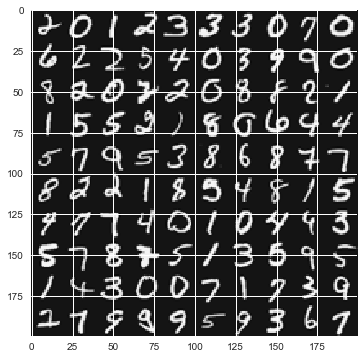

In [71]:
X = np.insert(X,0,1,axis=1)
displayData()

<img src='images/2.png'></img>
<img src='images/3.png'></img>
<img src='images/4.png'></img>
<img src='images/5.png'></img>

In [107]:
X = pd.DataFrame(digits['X'])
y = pd.DataFrame(digits['y'])

In [310]:
def sigmoid(val):
     return 1/(1 + np.exp(-val))
    
def calculate_hypothesis(theta, X):
    val = np.sum(X*theta, axis=1)
    return sigmoid(val)

def calculate_cost_func(theta, X, y, lam=0):
    m = X.shape[0]
    hypothesis = calculate_hypothesis(theta, X)
    cost = - np.sum((y * np.log(hypothesis)) + (1-y)*np.log(1-hypothesis))/m
    reg = lam*np.sum(np.power(theta[1:],2))/(2*m)
    return cost + reg

def calculate_gradient(theta, X, y, lam=0):
    m = X.shape[0]
    gradient_history = []
    for ind, t in enumerate(theta):
        gradient = 1/m * np.sum((calculate_hypothesis(theta, X) - y)* X.iloc[:, ind])
        regularization = 0
        if ind is not 0:
            regularization = lam/m*theta[ind]
        gradient = gradient + regularization
        gradient_history.append(gradient)
    return np.array(gradient_history)

def lrCostFunction(theta, X, y, lam):
    cost = calculate_cost_func(theta, X, y, lam)
    gradient = calculate_gradient(theta, X, y, lam)
    return cost, gradient

In [311]:
theta_t = np.array([-2, -1, 1, 2])
# X_t = np.array([[1,.1,.6,1.1], [1,.2,.7,1.2], [1,.3,.8,1.3], [1,.4,.9,1.4], [1,.5,1,1.5]])
ar =np.array(range(1,16))/10
ar = ar.reshape([3,5]).transpose()
X_t = pd.DataFrame(np.c_[np.ones(5), ar])
y_t = np.array([1, 0, 1, 0, 1])
lambda_t = 3

cost, gradient = lrCostFunction(theta_t, X_t, y_t, lambda_t)

print('Expected cost: 2.534819')
print(f'Calculated cost: {cost}')
print(f'Calculated gradient: {gradient}')
print('Expected Gradients:  0.146561 -0.548558 0.724722 1.398003')

Expected cost: 2.534819
Calculated cost: 2.5348193961097443
Calculated gradient: [ 0.14656137 -0.54855841  0.72472227  1.39800296]
Expected Gradients:  0.146561 -0.548558 0.724722 1.398003


<img src='images/6.png'></img>
<img src='images/7.png'></img>

In [268]:
X = pd.DataFrame(digits['X'])
X.insert(0, value=np.ones(X.shape[0]), column='ones')
X.head(2)

,ones,0,1,2,3,4,5,6,7,8,...,390,391,392,393,394,395,396,397,398,399
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [285]:
y_dummies = pd.get_dummies(y[0])
y_dummies.head(2)

,1,2,3,4,5,6,7,8,9,10
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1


In [494]:
init_theta = np.zeros(X.shape[1])
lam = .1
theta_history = dict()

print(f'Starting calculations at: {str(datetime.now())}')
for it in range(1,y_dummies.shape[1] + 1):
    print(f'Calculating theta for {it} class.')
    min_fun = fmin_cg(calculate_cost_func, init_theta, fprime=calculate_gradient, args=(X, y_dummies[it], lam), maxiter=10, full_output=True)
    theta_history[it] = min_fun[0]
    print(f'Finished at: {str(datetime.now())}.')
print('Calculations ended.')

Starting calculations at: 2017-05-28 22:14:57.503237
Calculating theta for 1 class.
         Current function value: 0.029297
         Iterations: 10
         Function evaluations: 29
         Gradient evaluations: 29
Finished at: 2017-05-28 22:19:29.257321.
Calculating theta for 2 class.
         Current function value: 0.084485
         Iterations: 10
         Function evaluations: 26
         Gradient evaluations: 26
Finished at: 2017-05-28 23:19:50.894687.
Calculating theta for 3 class.
         Current function value: 0.083454
         Iterations: 10
         Function evaluations: 28
         Gradient evaluations: 28
Finished at: 2017-05-28 23:26:38.962824.
Calculating theta for 4 class.
         Current function value: 0.060838
         Iterations: 10
         Function evaluations: 27
         Gradient evaluations: 27
Finished at: 2017-05-28 23:32:46.678481.
Calculating theta for 5 class.
         Current function value: 0.114597
         Iterations: 10
         Function evaluati

In [501]:
#make copy of theta output
tmp = dict()    
for theta in theta_history:
    tmp[theta] = theta_history[theta]

<img src='images/8.png'></img>

In [420]:
def calculate_hypothesis_for_row(theta, X):
    val = np.sum(X*theta)
    return sigmoid(val)
def predict_for_row(theta, X):
    return calculate_hypothesis_for_row(theta, X)

def predict(theta, X):
    return calculate_hypothesis(theta, X)

def get_prediction_results(theta_history, X):
    predictions = dict()
    for idx in theta_history:
        predictions[idx] = predict(theta_history[idx], X)
    return pd.DataFrame(predictions).T.idxmax()

In [507]:
predicted = get_prediction_results(theta_history, X)
accuracy_score(y, predicted)

0.83360000000000001

Predicted result is pretty low it may be because of warning:
* Warning: Desired error not necessarily achieved due to precision loss.
* this may help https://stackoverflow.com/questions/33853929/fmin-cg-desired-error-not-necessarily-achieved-due-to-precision-loss

in class 8
or/and because of small ammount of max iterations for algorithm. 

I Consider to retrain set on more interations and fix warning using different algorithm. This one predicts only 18 images as digit 8 so it is likely a problem.

In [513]:
init_theta = np.zeros(X.shape[1])
lam = .1
theta_history = dict()

print(f'Starting calculations at: {str(datetime.now())}')
for it in range(1,y_dummies.shape[1] + 1):
    print(f'Calculating theta for {it} class.')
    min_fun = minimize(calculate_cost_func, init_theta, jac=calculate_gradient, args=(X, y_dummies[it], lam), options={'maxiter':10, 'disp':True},)
    theta_history[it] = min_fun.x
    print(f'Finished at: {str(datetime.now())}.')
print('Calculations ended.')

Starting calculations at: 2017-05-29 10:16:56.498996
Calculating theta for 1 class.
         Current function value: 0.042065
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Finished at: 2017-05-29 10:18:41.481764.
Calculating theta for 2 class.
         Current function value: 0.104567
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Finished at: 2017-05-29 10:20:42.767038.
Calculating theta for 3 class.
         Current function value: 0.111402
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Finished at: 2017-05-29 10:22:27.870946.
Calculating theta for 4 class.
         Current function value: 0.081946
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Finished at: 2017-05-29 10:24:17.904696.
Calculating theta for 5 class.
         Current function value: 0.124663
         Iterations: 10
         Function evaluati

In [518]:
#make copy of theta output
theta_history_min_10_iter = dict()    
for theta in theta_history:
    theta_history_min_10_iter[theta] = theta_history[theta]

In [514]:
predicted = get_prediction_results(theta_history, X)
accuracy_score(y, predicted)

0.87239999999999995

When we use different algorithm we see some improvement in prediction results. So lets try use more iterations.

In [519]:
init_theta = np.zeros(X.shape[1])
lam = .1
theta_history = dict()

print(f'Starting calculations at: {str(datetime.now())}')
for it in range(1,y_dummies.shape[1] + 1):
    print(f'Calculating theta for {it} class.')
    min_fun = minimize(calculate_cost_func, init_theta, jac=calculate_gradient, args=(X, y_dummies[it], lam), method='BFGS', options={'maxiter':50, 'disp':True})
    theta_history[it] = min_fun.x
    print(f'Finished at: {str(datetime.now())}.')
print('Calculations ended.')

Starting calculations at: 2017-05-29 10:39:56.227019
Calculating theta for 1 class.
         Current function value: 0.023312
         Iterations: 50
         Function evaluations: 51
         Gradient evaluations: 51
Finished at: 2017-05-29 10:46:38.843022.
Calculating theta for 2 class.
         Current function value: 0.068360
         Iterations: 50
         Function evaluations: 51
         Gradient evaluations: 51
Finished at: 2017-05-29 10:53:04.297910.
Calculating theta for 3 class.
         Current function value: 0.071812
         Iterations: 50
         Function evaluations: 51
         Gradient evaluations: 51
Finished at: 2017-05-29 11:00:25.899231.
Calculating theta for 4 class.
         Current function value: 0.050061
         Iterations: 50
         Function evaluations: 51
         Gradient evaluations: 51
Finished at: 2017-05-29 11:07:59.929854.
Calculating theta for 5 class.
         Current function value: 0.075951
         Iterations: 50
         Function evaluati

In [521]:
predicted = get_prediction_results(theta_history, X)
accuracy_score(y, predicted)

0.93240000000000001

Result is not as high as in instructions. Maximum number of iterations has been exceeded, so I guess giving higher maxiter number would help here, thought I skipped this step because of hight calculations time.

<img src='images/9.png'></img>
<img src='images/10.png'></img>
<img src='images/11.png'></img>

In [522]:
weights = sio.loadmat('data/ex3weights.mat')
Theta1, Theta2 = weights['Theta1'], weights['Theta2']

In [527]:
def get_prediction_results_from_weigths(theta_weights, X):
    predictions = dict()
    idx = 0
    for th in theta_weights:
        predictions[idx] = predict(th, X)
        idx = idx+1
#     return pd.DataFrame(predictions).T.idxmax()
    return predictions

def get_predictions(Theta1, Theta2, X):
    df = pd.DataFrame(get_prediction_results_from_weigths(Theta1, X))
    df.insert(0, value=np.ones(df.shape[0]), column='ones')
    predicted = pd.DataFrame(np.dot(df,Theta2.T)).T.idxmax()
    #returning +1 because of indexing of train data
    return predicted + 1

In [539]:
predicted = get_predictions(Theta1, Theta2, X)
accuracy_score(y, predicted)

0.97519999999999996